# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

**The Columns**
- id: This column represents the unique id for each movie recorded in the dataset.
- imdb_id: This column represents the unique imdb id for each movie recorded in the dataset. 					
- popularity: This column represents how popular each movie recorded in the dataset is.
- budget: This column represents the budget for the production of each movie.
- revenue: This column represents the revenue generated for each movie.
- original_title: This column represents the title of the movies.
- cast: This column represents the actors that starred in the movies.
- homepage: This column represents
- director: This column represents the name of the director of the movie.
- tagline: This column represents movie tags.
- overview: This column represents a short synopsis for the movie.
- runtime: This column represents how long the movie runs for.
- genres: This column represents what type of genre each movie falls into.
- production_companies: This column represents the name of the production companies for each movie.
- release_date: This column represents the exact date(year, month, and day) the movie was released.
- vote_count: This column represents the total votes of each movie.
- vote_average: This column represents the vote ratings of each movie.
- release_year: This column represents the year the movie was released.
- budget_adj: This column represents the budget of each movie in terms of 2010 dollars, accounting for inflation over time.
- revenue_adj: This column represents the revenue of each movie in terms of 2010 dollars, accounting for inflation over time.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis
- What is the total Number of Movies Produced by Year?
- What is the total Number of Movies Produced by Genre?
- What is the total Number of Movies Produced by Year and Genre?
- What is the total Revenue on Movies by Year?
- What Genres generated the most Revenue?
- What Genres are the most popular?
- What Genres have the highest vote_average/vote_count?
- What Genres have the longest runtime?
- Does higher popularity value mean high revenue for movies?
- Does higher vote_count/vote_average mean high revenue for movies?
- Does longer runtime mean high revenue for movies?
- Is there any correlation whatsoever between popularity and vote_average/vote_count?

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

- Loading the Data
- Data Cleaning
    - Dropping Unimportant Columns, duplicates, and null values.
    - Handling the genres column

### Loading the Data

In [2]:
#Load the data into a pandas DataFrame and assigning it to the variable name df.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Find out datatype and if there exist any missing values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are some columns with missing values which are cast, homepage, director, tagline, keywords, overview, genres and production_companies. Also, all datatypes are correct except release_date and release_year. I'll be leaving the datatype of release_year as is. For the release_date, as I go on in my analysis, it will be dropped as it has no significance for this analysis.

In [4]:
#Quick summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the above summary statistics, the minimum popularity is 0.000065 and the maximum popularity is 32.985763. The lower quartile, median and upper quartile values shows that most movies do not have high popularity values. This is evident in the low mean value of 0.646441.
The minimum revenue is 11.7 million and 2.7 billion for the maximum revenue.
The minimum vote_count is 10 and 9767 for the maximum vote_count.

In [5]:
#The number of rows and columns in the data.
df.shape

(10866, 21)

In [6]:
#Total number of null or missing values in each column.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
- Dropping Unimportant Columns, duplicates, and null values.
- Handling the genres column

**Dropping Unimportant Columns, duplicates, and null values.**

The following columns will be dropped as they are not significant or needed for this analysis: 'id', 'imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies' and 'release_date'.

In [7]:
#Dropping insignificant coluumns
df.drop(['id', 'imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'], axis = 1, inplace=True)
df.head(1)

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [8]:
#Number of rows and columns after dropping insignificant columns
df.shape

(10866, 10)

In [9]:
#Number of duplicate entries if any.
sum(df.duplicated())

1

In [10]:
#Drop duplicated entry.
df.drop_duplicates(inplace=True)

In [11]:
#Cross-check that duplicate entries are gone.
sum(df.duplicated())

0

In [12]:
#Number of missing values in each column.
df.isnull().sum()

popularity       0
budget           0
revenue          0
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

After dropping insignificant columns, the genres column is the remaining column with missing values. Since the genres column is needed and very important for this analysis, I'll be dropping the rows with missing values.

In [13]:
#Drop missing values.
df.dropna(inplace=True)

In [14]:
#Cross-check that no missing values still exist.
df.isnull().sum()

popularity      0
budget          0
revenue         0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [15]:
#The number of rows and columns in the data after dropping insignificant columns and null values.
df.shape

(10842, 10)

In [16]:
#Take a look at the data
df.head(2)

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


**Handling the genres column.**

The genres column contains some rows with multiple values. To handle this, I'll be taking the first value for each row as the genres value for the associated movie.

In [17]:
#Number of unique values in the genres column. 
df.genres.nunique()

2039

2039 unique values is too much to group our data by. So, I'll be taking the first genre value in each row and making it the genre value for the associated movie.

In [18]:
#Count of each genre type
df.genres.value_counts()

Comedy                                     712
Drama                                      712
Documentary                                312
Drama|Romance                              289
Comedy|Drama                               280
                                          ... 
Action|Comedy|Crime|Mystery|Thriller         1
Action|Adventure|Drama|Romance|Thriller      1
Drama|Action|Crime|Mystery                   1
Action|War|Science Fiction                   1
Documentary|Drama|War|Crime|Mystery          1
Name: genres, Length: 2039, dtype: int64

In [19]:
#Splitting the values in the genre column to extract the first value(genre).
genre = df.genres.str.split(pat='|', expand=True)

In [20]:
#Looking at the genre dataframe.
genre.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [21]:
#Drop the remaining columns except the first which contains the first value gotten from the genres column of the data.
genre.drop([1, 2, 3, 4], axis=1, inplace = True)
genre.head()

,0
0,Action
1,Action
2,Adventure
3,Action
4,Action


In [22]:
#Rename the column as genres
genre = genre.rename(columns = {0 : 'genres'})
genre.head()

,genres
0,Action
1,Action
2,Adventure
3,Action
4,Action


I will drop the original genres column from the data and replace it with the newly created genres column/series.

In [23]:
#Drop the original genres column from the data as it will be replaced by the newly created genres column/series.
df.drop('genres', axis=1, inplace=True)

In [24]:
#Cross-check that the original genres column has been dropped.
df.head(1)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09


In [25]:
#Create a new column called genres for the data with the newly created genres column/series assigned to it.
df['genres'] = genre
df.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,150000000,378436354,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,110000000,295238201,119,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,200000000,2068178225,136,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,190000000,1506249360,137,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


In [26]:
#Cross-check that there is no missing or null values.
df.isnull().sum()

popularity      0
budget          0
revenue         0
runtime         0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
genres          0
dtype: int64

In [27]:
#Number of unique values in the newly created genres column.
df.genres.nunique()

20

In [28]:
#Count of each genre type in the genres column.
df.genres.value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres, dtype: int64

In [29]:
#Cross-check the column datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10842 non-null  float64
 1   budget        10842 non-null  int64  
 2   revenue       10842 non-null  int64  
 3   runtime       10842 non-null  int64  
 4   vote_count    10842 non-null  int64  
 5   vote_average  10842 non-null  float64
 6   release_year  10842 non-null  int64  
 7   budget_adj    10842 non-null  float64
 8   revenue_adj   10842 non-null  float64
 9   genres        10842 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 931.7+ KB


<a id='eda'></a>
## Exploratory Data Analysis
- Quick Visualization of Features Distribution
- Quick Visualization of Features Relationship
- Relationship Between Independent Features
- Distribution of Dependent Features/Variables
- Total Number of Movies Produced by Year
- Total Number of Movies Produced by Genre
- Total Number of Movies Produced byYear and Genre
- Total Revenue on Movies by Year

#### Quick Visualization of Features Distribution

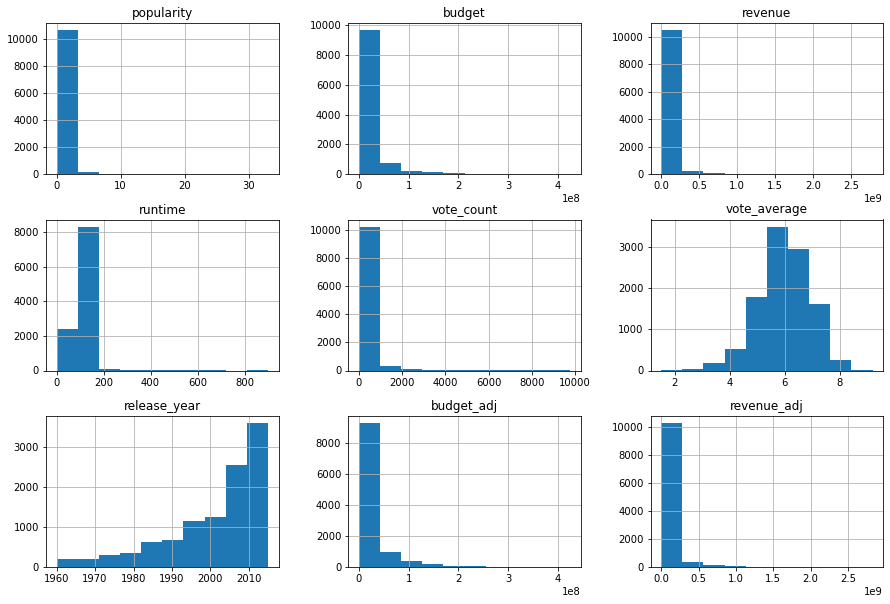

In [30]:
#Distribution of the numerical features in the dataset.
df.hist(figsize=(15,10));

The distribution of the popularity column seen in the previous summary statistics can now be seen clearly as the popularity column histogram is skewed to the right. This is same for the budget, revenue, vote_count, vote_average and runtime. Also, release_year is skewed to the left, it can be inferred that more movies were produced or released from 2000s to 2015 as opposed to earlier years.

#### Quick Visualization of Features Relationship

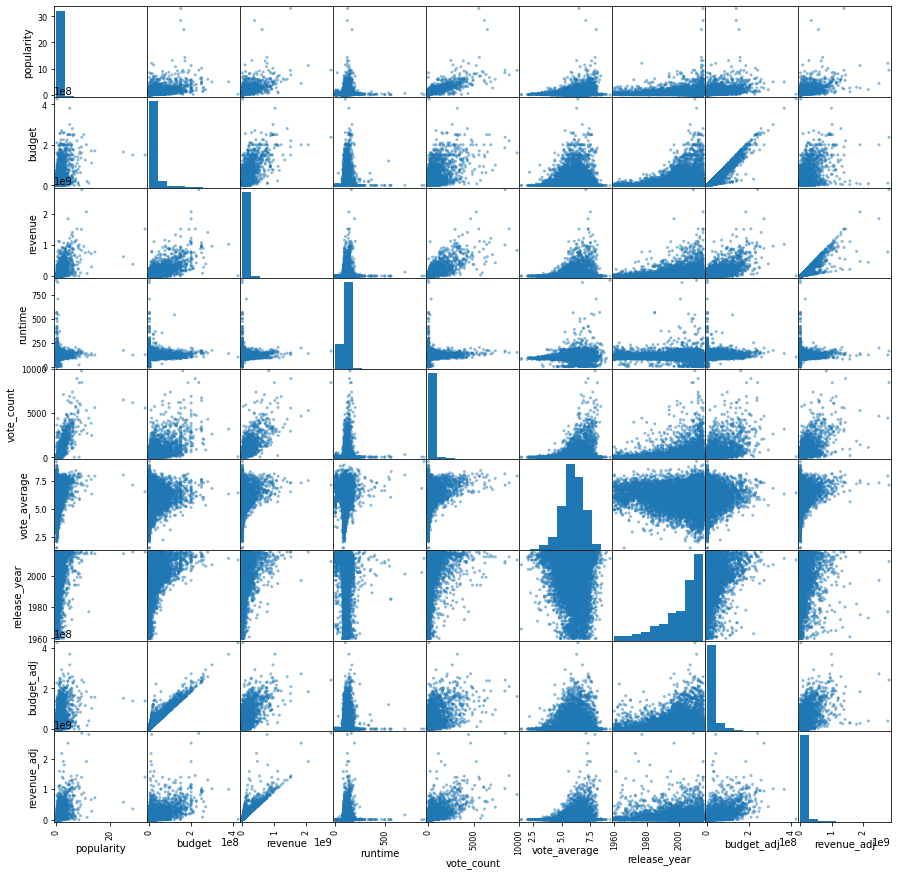

In [31]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

The above is a visualization to show the relationship between the numerical features of the data.

#### Relationship Between Independent Features

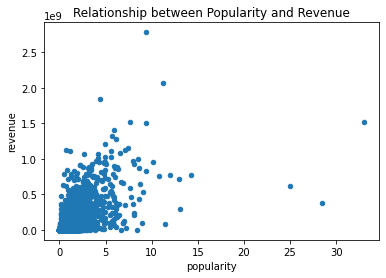

In [32]:
#Relationship between popularity and revenue.
df.plot(x='popularity', y='revenue', kind='scatter');
plt.title('Relationship between Popularity and Revenue');

There is some positive correlation between popularity and revenue as this plot shows that the correlation is not that strong. This will be investigated further later in the analysis.

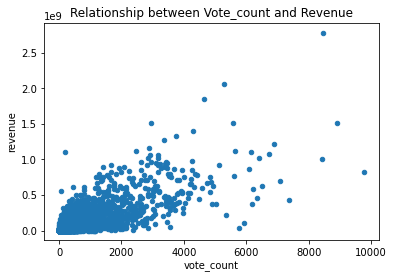

In [33]:
#Relationship between vote_count and revenue.
df.plot(x='vote_count', y='revenue', kind='scatter');
plt.title('Relationship between Vote_count and Revenue');

There is a stronger positive correlation between vote_count and revenue than between popularity and revenue. This will be investigated further later in the analysis.

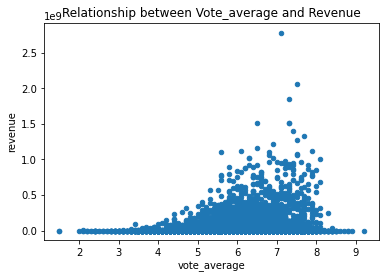

In [34]:
#Relationship between vote_average and revenue.
df.plot(x='vote_average', y='revenue', kind='scatter');
plt.title('Relationship between Vote_average and Revenue');

There is some positive correlation between vote_average and revenue. This will be investigated further later in the analysis.

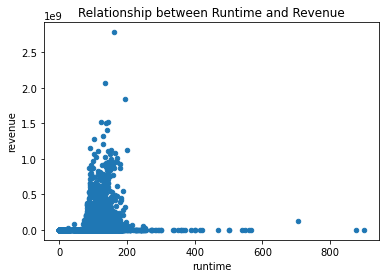

In [35]:
#Relationship between runtime and revenue.
df.plot(x='runtime', y='revenue', kind='scatter');
plt.title('Relationship between Runtime and Revenue');

There is no correlation between runtime and revenue. This will be investigated further later in the analysis.

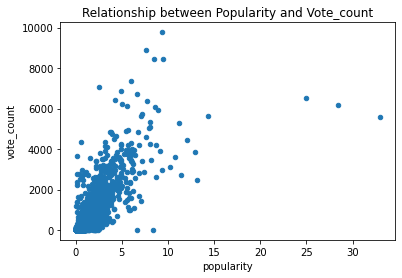

In [36]:
#Relationship between popularity and vote_count.
df.plot(x='popularity', y='vote_count', kind='scatter');
plt.title('Relationship between Popularity and Vote_count');

There is a positive correlation between popularity and vote_count. This will be investigated further later in the analysis.

#### Distribution of Dependent Features/Variables
I will be checking the distribution of the revenue and revenue_adj columns to see if there's any significant difference.

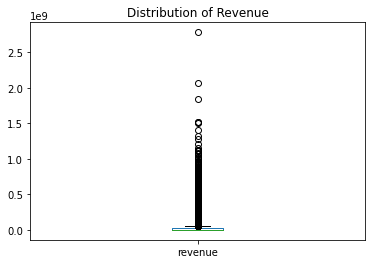

In [37]:
#Distribution of the revenue column.
df['revenue'].plot(kind='box');
plt.title('Distribution of Revenue');

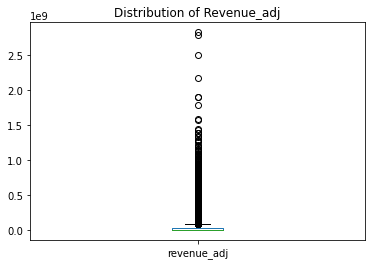

In [38]:
#Distribution of the revenue_adj column.
df['revenue_adj'].plot(kind='box');
plt.title('Distribution of Revenue_adj');

The distribution of the revenue and revenue_adj column are alike so going forward, I'll be making use of the revenue column for my analysis.

### What is the total Number of Movies Produced by Year?

#### Total Number of Movies Produced by Year

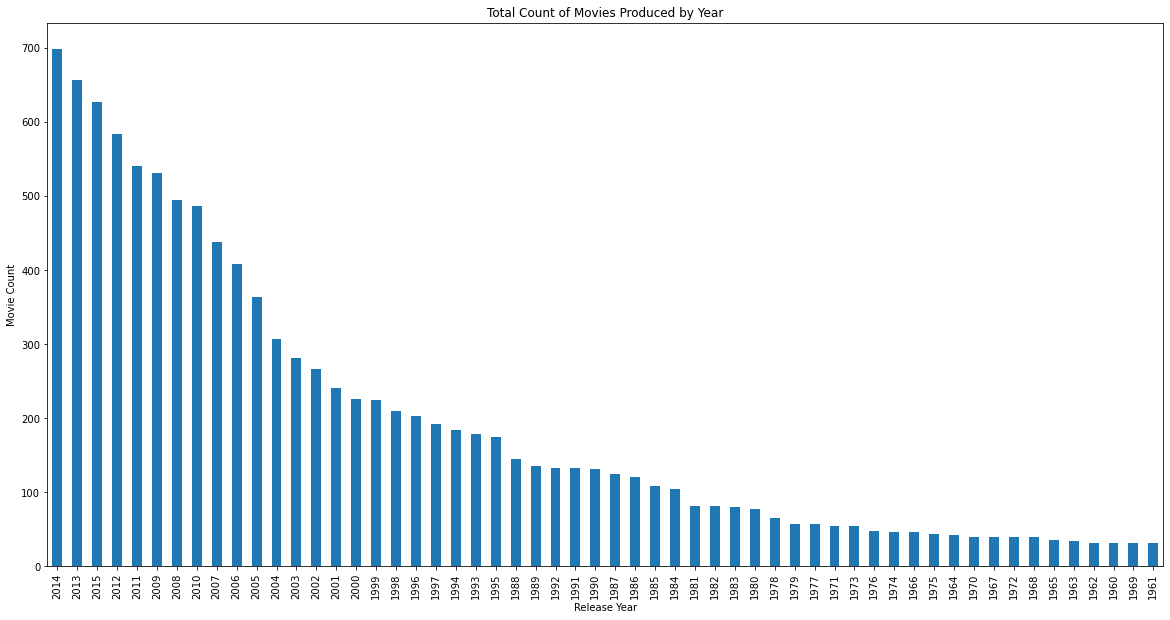

In [39]:
#Value counts of movies for each year.
df.release_year.value_counts().plot(kind = 'bar', figsize = (20, 10));
plt.xlabel('Release Year');
plt.ylabel('Movie Count')
plt.title('Total Count of Movies Produced by Year');

The total amount of movies produced by year has been increasing steadily over the years. The year 2014 recorded the most number of movies released/produced.

### What is the total Number of Movies Produced by Genre?

#### Total Number of Movies Produced by Genre

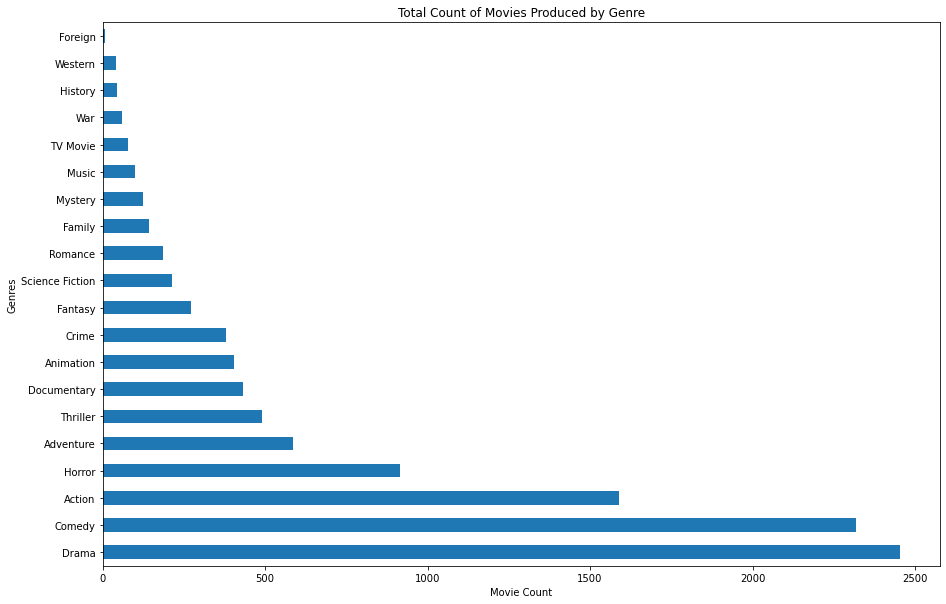

In [40]:
#Value counts of movies for each genre.
df.genres.value_counts().plot(kind='barh', figsize=(15,10));
plt.xlabel('Movie Count')
plt.ylabel('Genres')
plt.title('Total Count of Movies Produced by Genre');

The genres Drama and Comedy have the most number of movies while Foreign and Western genres have the lowest number of movies.

### What is the total Number of Movies Produced by Year and Genre?

#### Total Number of Movies Produced byYear and Genre

In [41]:
#Value counts of movies for each genre by year.
genres_by_year = df.groupby('release_year')['genres'].value_counts()

In [42]:
#Unique release_year values.
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [43]:
#Print the total count of movies by genres for each year.
years = np.array(df.release_year.unique())
for year in years:
    print(year, genres_by_year[year])  

2015 genres
Drama              144
Comedy              78
Thriller            72
Horror              63
Action              59
Documentary         43
Romance             28
Crime               22
Science Fiction     21
Adventure           20
Mystery             14
Animation           13
Family              11
Fantasy             11
Music               10
History              7
TV Movie             6
War                  3
Western              2
Name: genres, dtype: int64
2014 genres
Drama              148
Comedy             102
Thriller            86
Action              65
Documentary         59
Horror              58
Romance             31
Adventure           29
Crime               18
Science Fiction     16
Animation           15
Family              15
War                 11
Mystery             10
Music                9
Fantasy              8
History              8
TV Movie             8
Western              3
Name: genres, dtype: int64
1977 genres
Drama              14
Horror        

1976 genres
Drama          11
Action         10
Comedy         10
Horror          7
Adventure       2
Thriller        2
Crime           1
Documentary     1
Fantasy         1
Mystery         1
TV Movie        1
Name: genres, dtype: int64
1993 genres
Drama              41
Action             40
Comedy             39
Horror             10
Adventure           7
Fantasy             7
Crime               6
Family              5
Romance             5
Animation           4
Music               4
Mystery             2
Science Fiction     2
Thriller            2
Documentary         1
History             1
War                 1
Western             1
Name: genres, dtype: int64
1967 genres
Comedy             11
Action              5
Crime               5
Drama               4
Horror              3
Adventure           2
Fantasy             2
Music               2
Animation           1
Documentary         1
Family              1
Science Fiction     1
Thriller            1
Western             1
Name: ge

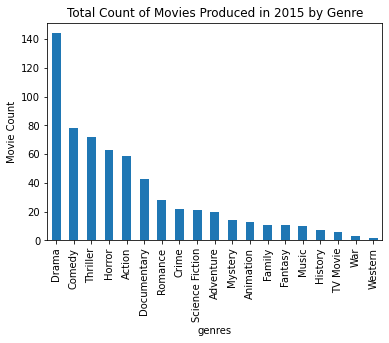

In [44]:
#Plotting the total count of movies by genres in 2015 
genres_by_year[2015].plot(kind = 'bar');
plt.ylabel('Movie Count')
plt.title('Total Count of Movies Produced in 2015 by Genre');

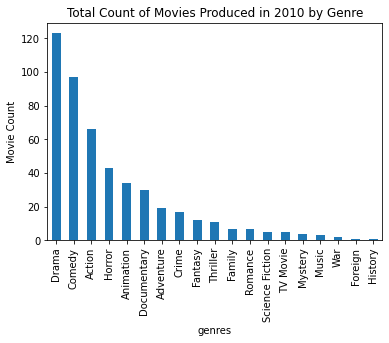

In [45]:
#Plotting the total count of movies by genres in 2010 
genres_by_year[2010].plot(kind = 'bar');
plt.ylabel('Movie Count')
plt.title('Total Count of Movies Produced in 2010 by Genre');

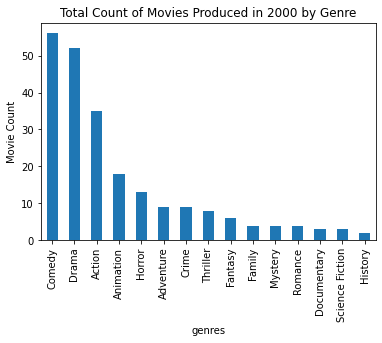

In [46]:
#Plotting the total count of movies by genres in 2000
genres_by_year[2000].plot(kind = 'bar');
plt.ylabel('Movie Count')
plt.title('Total Count of Movies Produced in 2000 by Genre');

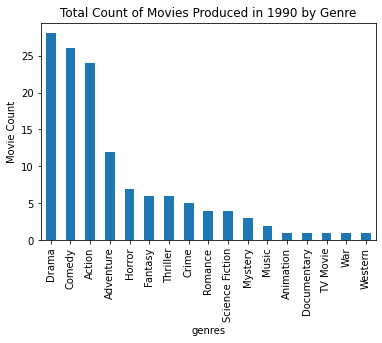

In [47]:
#Plotting the total count of movies by genres in 1990 
genres_by_year[1990].plot(kind = 'bar');
plt.ylabel('Movie Count')
plt.title('Total Count of Movies Produced in 1990 by Genre');

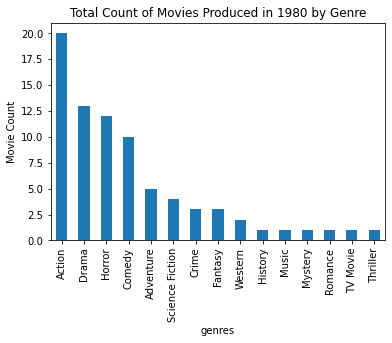

In [48]:
#Plotting the total count of movies by genres in 1980 
genres_by_year[1980].plot(kind = 'bar');
plt.ylabel('Movie Count')
plt.title('Total Count of Movies Produced in 1980 by Genre');

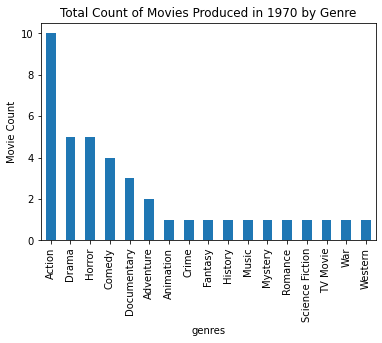

In [49]:
#Plotting the total count of movies by genres in 1970 
genres_by_year[1970].plot(kind = 'bar');
plt.ylabel('Movie Count')
plt.title('Total Count of Movies Produced in 1970 by Genre');

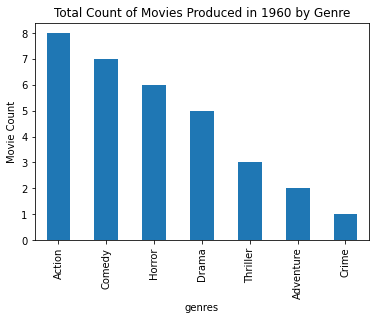

In [50]:
#Plotting the total count of movies by genres in 1960 
genres_by_year[1960].plot(kind = 'bar');
plt.ylabel('Movie Count')
plt.title('Total Count of Movies Produced in 1960 by Genre');

From the above visualizations, the movie genres that dominated each decade can be clearly seen. It can also be seen that movie genres began to much more diversify over the years.

### What is the total Revenue on Movies by Year?

#### Total Revenue on Movies by Year

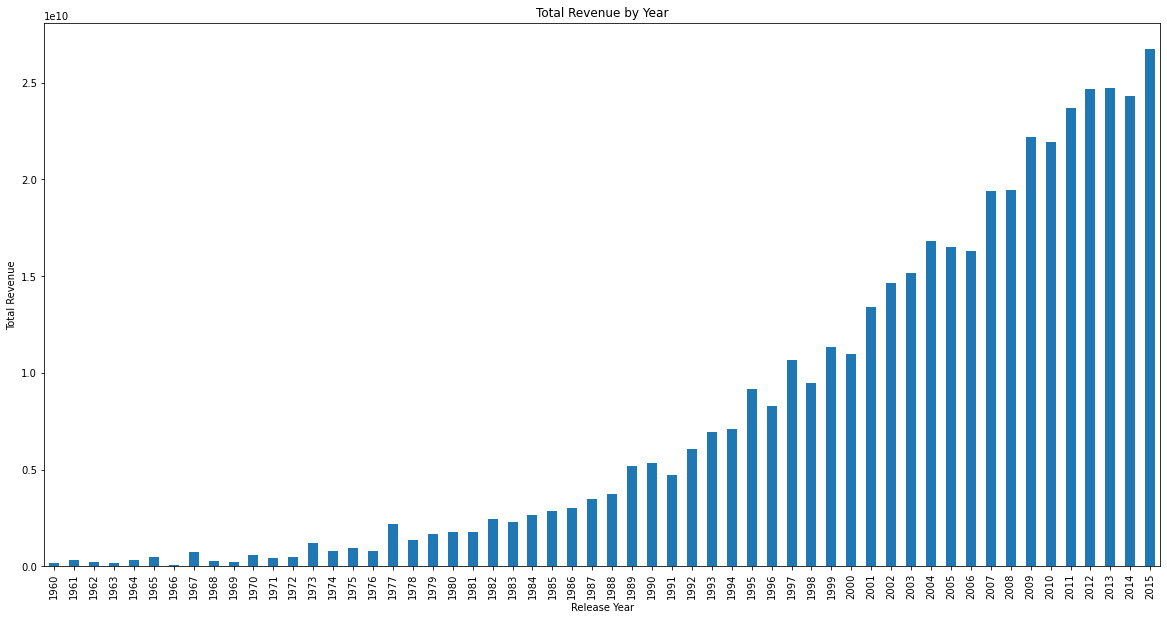

In [51]:
#Sum of revenue for each year.
df.groupby('release_year')['revenue'].sum().plot(kind = 'bar', figsize = (20, 10));
plt.xlabel('Release Year');
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Year');

The total revenue generated from movies has greatly increased over the years especially from the 2000s. The year 2015 recorded the highest revenue generated.

### What Genres generated the most Revenue?

In [52]:
#Function to plot Genre aggregations.
def genre_aggregation(column):
    agg = df.groupby('genres')[column].mean()
    plt.xlabel('Genres')
    plt.title(f'Average {column} by Genre')
    plt.ylabel(f'Average {column}');
    return agg.plot(kind='bar', figsize=(10,8));

#### Average Revenue by Genre

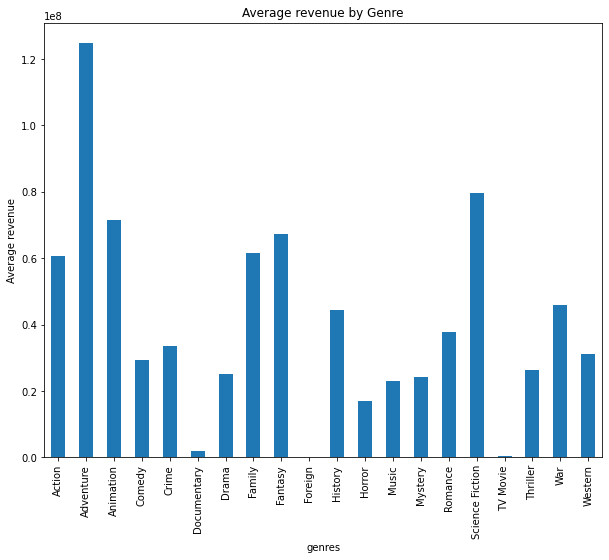

In [53]:
#Average revenue by genres.
genre_aggregation('revenue');

The genres Adventure and Science Fiction have the first and second highest average revenue generated respectively. Foreign genre records the least average revenue.

### What Genres are the most popular?

#### Average Popularity by Genre

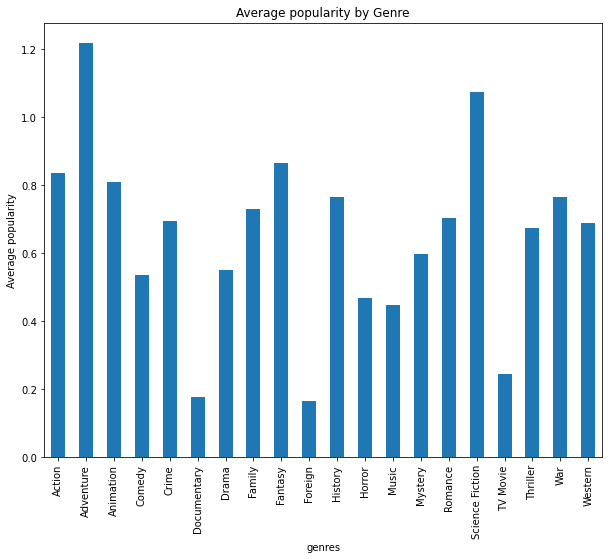

In [54]:
#Average popularity by genres.
genre_aggregation('popularity');

The genres Adventure and Science Fiction have the first and second highest average popularity respectively. Foreign genre records the least average popularity.

### What Genres have the highest vote_average/vote_count?

#### Average Vote Count by Genre

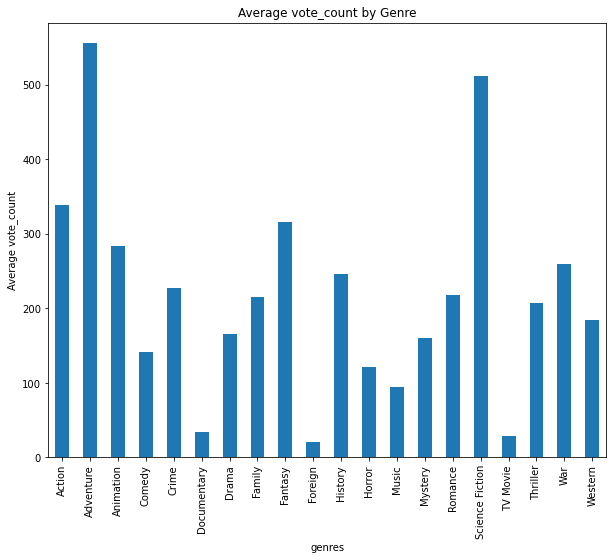

In [55]:
#Average Vote_count by genres.
genre_aggregation('vote_count');

The genres Adventure and Science Fiction have the first and second highest average vote_count respectively. Foreign genre records the least average vote_count.

#### Average Vote Ratings/Average by Genre

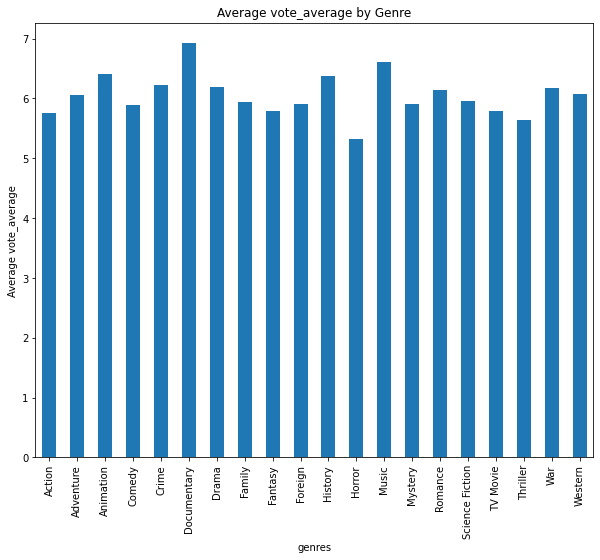

In [56]:
#Average Vote_average by genres.
genre_aggregation('vote_average');

The genre Documentary has the highest average vote_average. The average vote_average seems not to follow the same trend as vote_count. This will be checked in further analysis.

### What Genres have the longest runtime?

#### Average Runtime by Genre

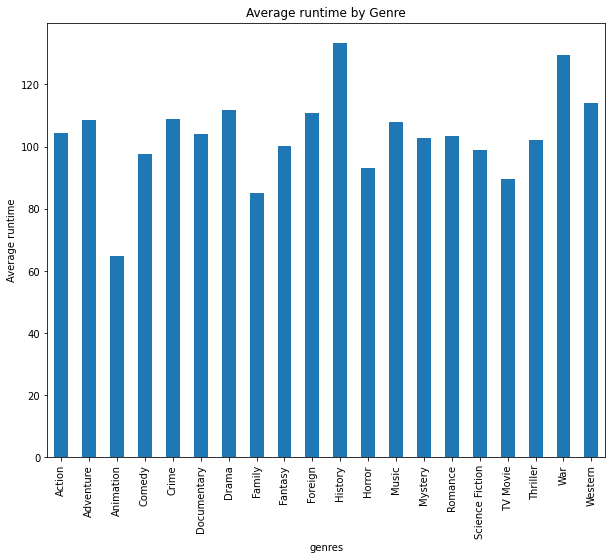

In [57]:
#Average runtime by genres.
genre_aggregation('runtime');

The genre History has the highest average runtime followed by the genre War.

<a id='conclusions'></a>
## Conclusions

### Does higher popularity value mean high revenue for movies?

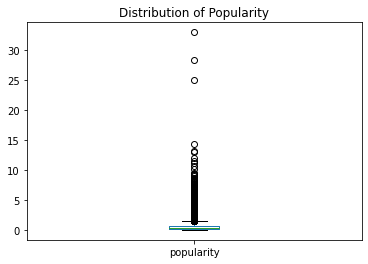

In [58]:
#The distribution of the popularity column.
df['popularity'].plot(kind='box');
plt.title('Distribution of Popularity');

In [59]:
df.popularity.describe()

count    10842.000000
mean         0.647461
std          1.001032
min          0.000065
25%          0.208210
50%          0.384532
75%          0.715393
max         32.985763
Name: popularity, dtype: float64

In [60]:
#Query the popularity column to seperate into high and low popularity using the median.
high_popularity = df.query('popularity > 0.384532')
low_popularity = df.query('popularity <= 0.384532')

In [61]:
#Find the average of the high_popularity and low_popularity.
print('Most Popular Movies Average Revenue', high_popularity.revenue.mean())
print('Less Popular Movies Average Revenue', low_popularity.revenue.mean())

Most Popular Movies Average Revenue 75882005.50931562
Less Popular Movies Average Revenue 3940762.591588268


From the above investigation, the most popular movies generate higher average revenue than the less popular movies. So, popularity does have a positive correlation with revenue.

### Does higher vote_count/vote_average mean high revenue for movies?

#### Does higher vote_average imply higher revenue?

In [62]:
df.vote_average.describe()

count    10842.000000
mean         5.974064
std          0.934257
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [63]:
#create the bin edges of the vote_average from the minimum, upper quartile, lower quartile and maximum values.
bin_edges = [1.5, 5.4, 6.6, 9.2]
bin_names = ['Low', 'Medium', 'High']

In [64]:
#create a new column vote_ratings from the bin edges.
df['vote_ratings'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)
df.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,vote_ratings
0,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Medium
1,28.419936,150000000,378436354,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,High
2,13.112507,110000000,295238201,119,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Medium
3,11.173104,200000000,2068178225,136,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,High
4,9.335014,190000000,1506249360,137,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,High


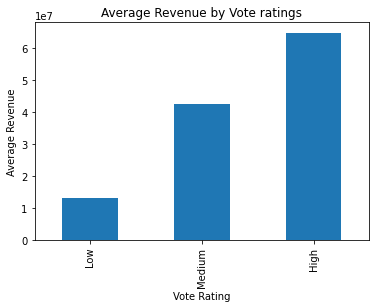

In [65]:
#Find the average revenue and group by vote_ratings.
vote_ratings_ave = df.groupby('vote_ratings')['revenue'].mean()
vote_ratings_ave.plot(kind='bar', title = 'Average Revenue by Vote ratings')
plt.xlabel('Vote Rating')
plt.ylabel('Average Revenue');

From the above investigation, the movies with higher vote ratings(vote_average) generate higher revenue on average than the movies with lower vote ratings(vote_average). So, vote_average does have a positive correlation with revenue.

#### Does higher vote_count imply higher revenue?

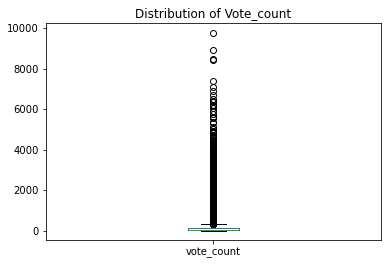

In [66]:
#The distribution of the vote_count column.
df['vote_count'].plot(kind='box');
plt.title('Distribution of Vote_count');

In [67]:
df.vote_count.describe()

count    10842.000000
mean       217.823649
std        576.180993
min         10.000000
25%         17.000000
50%         38.000000
75%        146.000000
max       9767.000000
Name: vote_count, dtype: float64

In [68]:
#Query the vote_count column to seperate into high and low vote_count using the median.
high_vote_count = df.query('vote_count >= 38')
low_vote_count = df.query('vote_count < 38')

In [69]:
#Find the average of the high_vote_count and low_vote_count.
print('Most Voted Movies Average Revenue', high_vote_count.revenue.mean())
print('Less Voted Movies Average Revenue', low_vote_count.revenue.mean())

Most Voted Movies Average Revenue 77189487.93249176
Less Voted Movies Average Revenue 2009204.7686011905


From the above investigation, the most voted movies generate higher revenue on average than the less voted movies. So, vote_count does have a positive correlation with revenue.

### Does longer runtime mean high revenue for movies?

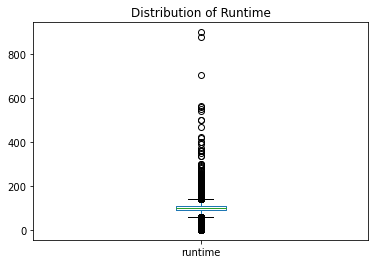

In [70]:
#The distribution of the runtime column.
df['runtime'].plot(kind='box');
plt.title('Distribution of Runtime');

In [71]:
df.runtime.describe()

count    10842.000000
mean       102.138443
std         31.294612
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [72]:
#Query the runtime column to seperate into long and short runtime using the median.
long_runtime = df.query('runtime >= 99')
short_runtime = df.query('runtime < 99')

In [73]:
#Find the average of the long_runtime and short_runtime.
print('High Runtime Movies Average Revenue', long_runtime.revenue.mean())
print('Low Runtime Movies Average Revenue', short_runtime.revenue.mean())

High Runtime Movies Average Revenue 60274689.06336742
Low Runtime Movies Average Revenue 19130642.669399925


From the above investigation, movies with longer runtime do not generate higher revenue on average than movies with shorter runtime.

### Is there any correlation whatsoever between popularity and vote_average?

#### Does higher vote_average imply higher popularity?

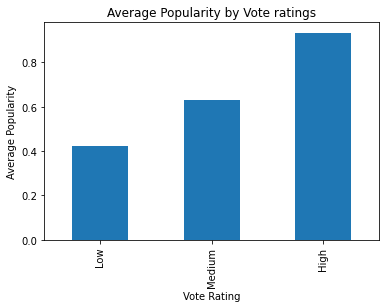

In [74]:
#Find the average popularity and group by vote_ratings.
vote_ratings_ave = df.groupby('vote_ratings')['popularity'].mean()
vote_ratings_ave.plot(kind='bar', title = 'Average Popularity by Vote ratings')
plt.xlabel('Vote Rating')
plt.ylabel('Average Popularity');

From the above investigation, the movies with higher vote ratings(vote_average) are more popular than movies with lower vote ratings(vote_average). So, popularity does have a positive correlation with vote ratings(vote_average).

#### Limitations and Further Research
The limitation of this analysis has to do with the genres column. The way the genres column was handled has **some limitations** as the first value in each row may not necessarily be the genre that **perfectly describes** the movie. Further Research on how the original genres column was created or how genres are assigned to movies will make this analysis better.

Another limitation has to do with the revenue_adj column. Further Research on how to deal with this column could also make this analysis better.